# Python中的数据类型详细分析

## 1. Scalars（标量数据）

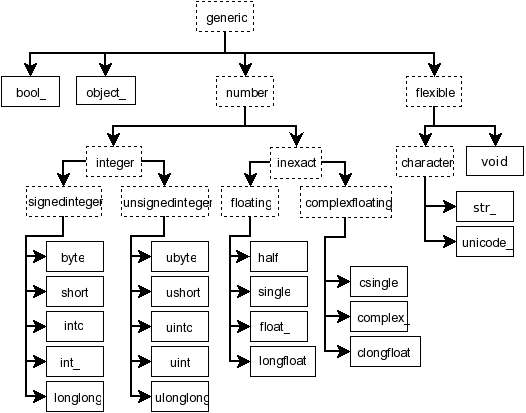

Array中的标量类型，相关Python类型的表格：

| Array | Related |
| :--- | :--- |
| int_ | IntType ( Python 2.0 ) |
| float_ | FloatType |
| complex_ | ComplexType |
| bytes_ | BytesType |
| unicode_ | UnicodeType |

Numpy中默认的数据类型是：float_，platform?表示类型有可能不是全平台通用的，compatibility表示C或Python可通用可支持。

| 大类型 | 数据类型 | 备注 | 符号 |
| :--- | :--- | :--- | :--- |
| Boolean | bool_ | 适用: Python bool | '?' |
|| bool8 | 8位 | |
| Integers | byte | 适用：C char | 'b' |
|| short | 适用：C short | 'h' |
|| intc | 适用：C int | 'i' |
|| int_ | 适用：Python int | 'l' |
|| longlong | 适用：C long long | 'q' |
|| intp | 足够大的指针整数 | 'p' |
|| int8 | 8位 ||
|| int16 | 16位 ||
|| int32 | 32位 ||
|| int64 | 64位 ||
| Unsigned Integers：无符号整数 | ubyte | 适用：C unsigned char | 'B' |
|| ushort | 适用：C unsigned short | 'H' |
|| uintc | 适用：C unsigned int | 'I' |
|| uint | 适用：Python int | 'L' |
|| ulonglong | 适用：C long long | 'Q' |
|| uintp | 足够大的指针整数 | 'P' |
|| uint8 | 8位 ||
|| uint16 | 16位 ||
|| uint32 | 32位 ||
|| uint64 | 64位 ||
| Floating-point numbers：浮点数 | half | IEEE 754中16位浮点数，深度学习常用 | 'e' |
|| single | 适用：C float | 'f' |
|| double | 适用：C double ||
|| float_ | 适用：Python float ||
|| longfloat | 适用：C long float ||
|| float16 | 16位 ||
|| float32 | 32位 ||
|| float64 | 64位 ||
|| float96 | 96位，platform? ||
|| float128 | 128位，platform? ||
| Complex floating-point numbers：复数 | csingle || 'F' |
|| complex_ | 适用：Python complex | 'D' |
|| clongfloat |||
|| complex64 | 双32位浮点数 ||
|| complex128 | 双64位浮点数 ||
|| complex192 | 双96位浮点数，platform? ||
|| complex256 | 双128位浮点数，platform? ||
| 任意Python object | object_ | 任意Python对象 | 'O' |
| flexible类型 | bytes_ | 适用：Python bytes | 'S#' |
|| unicode_ | 适用：Python unicode/str | 'U#' |
|| void || 'V#' |

## 2. numpy中的数据类型 dtype

一个数据类型对象是 numpy.dtype 的一个实例，它描述了这个数据的几个方面：

* 数据类型
* 数据尺寸（字节）
* 字节顺序（小大端，Little-Endian / Big-Endian）
* 如果是结构体或聚集结果
    * 结构的字段集（fields），哪些可被访问
    * 每个字段的数据类型
    * 每个字段存储的内存块信息
* 如果是子数组（Sub-Array），则描述它的数据类型和shape信息（包括它的维度）


## 3. pandas中的Series

Series是Pandas中最基本的对象，又称为**序列**，类似一种一位数组，它的结果解读分为三部分

1. 最左边一列是索引信息，注意索引可以被 index 进行重命名。
2. 右边一列则是数组中存储的数据。
3. 最下边是该一位数组中的元素的类型，如果有名称则还会显示 Name。

整体格式如下：

```shell
black    400
green    300
pink     900
red      100
Name: 名称, dtype：类型
```

该对象可以直接通过 values 和 index 获取内容和索引，值的类型是一个 array，而索引类型往往是一个 RangeIndex，当索引被重写的时候，该索引又可以称为元素对应的标签，类似于 numpy 中元素带标签的数组。注意 array, list, Series 三者的区别：

* List是Python原生支持的集合，该集合中的元素可以是不同类型。
* array和Series中的元素必须是同一种类型——这也是元素中包含了 dtype 的原因。

Series支持的部分基本功能：索引访问、切片、选择、过滤，其中过滤和切片之后的数据类型还是 Series。

### 4. DataFrame常用的查询方法

DataFrame是pandas中的二维数组，在构造时，index为行索引，columns为列索引，这里主要介绍 DataFrame中常用的查询方法：loc, iloc, ix, at, iat等。

* loc可以传入单个标签参数，返回的值为一个Series对象，此处标签为行索引。
* loc也可以传入两个标签参数，同时使用 index 和 columns 定位。
* loc的参数可以是一个数组，index, columns 都可以使用数组和数组切片语法，返回值为 DataFrame。
* 带 i 前缀的直接使用索引而不是标签，行索引和列索引的值。
* 不仅如此，loc 的参数还可以接受选择结果，同时支持行选择和列选择。
* at, iat 则等价于 loc, iloc 的双参数版本（同时提供行索引和列索引的读取）。
* ix 方法在 0.20.0 之后弃用，可忽略。

In [5]:
import numpy as np 
import pandas as pd
rowdata = {'姓名':["吕布","赵云","周瑜","关羽","张飞","张辽","诸葛亮"],
          '字':['奉先','子龙','公瑾','云长','翼德','文远','孔明'],
          '武力':[100, 97, 89, 98, 99, 95, 72],
          '智力':[17, 93, 98, 86, 51, 91, 100],
          '统率':[92, 86, 97, 100, 89, 91, 96]
          }
user_data = pd.DataFrame(rowdata)

user_data

,姓名,字,武力,智力,统率
0,吕布,奉先,100,17,92
1,赵云,子龙,97,93,86
2,周瑜,公瑾,89,98,97
3,关羽,云长,98,86,100
4,张飞,翼德,99,51,89
5,张辽,文远,95,91,91
6,诸葛亮,孔明,72,100,96


In [17]:
# 读取吕布的数据，一行，返回一位数组 Series
user1 = user_data.loc[0]
print(user1)
type(user1)

姓名     吕布
字      奉先
武力    100
智力     17
统率     92
Name: 0, dtype: object


pandas.core.series.Series

In [20]:
# 筛选武力大于 90 的人
user_data.loc[user_data['武力']>90]

,姓名,字,武力,智力,统率
0,吕布,奉先,100,17,92
1,赵云,子龙,97,93,86
3,关羽,云长,98,86,100
4,张飞,翼德,99,51,89
5,张辽,文远,95,91,91


In [25]:
# 修改标签
d2 = pd.DataFrame(user_data.values, index=['L','Z','ZY','GY','ZF','ZL','ZGL'])
d2

,0,1,2,3,4
L,吕布,奉先,100,17,92
Z,赵云,子龙,97,93,86
ZY,周瑜,公瑾,89,98,97
GY,关羽,云长,98,86,100
ZF,张飞,翼德,99,51,89
ZL,张辽,文远,95,91,91
ZGL,诸葛亮,孔明,72,100,96
